In [1]:
import sys
import os
from mlektic.linear_reg import LinearRegressionArcht
from mlektic.preprocessing import pd_dataset
from mlektic.methods import regularizer_archt, optimizer_archt
import pandas as pd
import numpy as np

# Linear Regression

In [2]:
import sys
import os
from mlektic.linear_reg import LinearRegressionArcht
from mlektic.preprocessing import pd_dataset
from mlektic.methods import regularizer_archt, optimizer_archt
import pandas as pd
import numpy as np

# Generar datos de ejemplo
np.random.seed(42)  # Para reproducibilidad
n_samples = 100
feature1 = np.random.rand(n_samples)
feature2 = np.random.rand(n_samples)

# Generar una variable objetivo con una relación lineal + ruido
target = 3 * feature1 + 5 * feature2 + np.random.randn(n_samples) * 0.5

# Crear el DataFrame
df = pd.DataFrame({
    'feature1': feature1,
    'feature2': feature2,
    'target': target
})

# Dividir en conjuntos de entrenamiento y prueba
train_set, test_set = pd_dataset(df, ['feature1', 'feature2'], 'target', 0.8)

# Lista de configuraciones de optimizadores y regularizadores
optimizer_configs = [
    optimizer_archt('sgd-standard', learning_rate=0.01),
    optimizer_archt('sgd-stochastic', learning_rate=0.01),
    optimizer_archt('sgd-mini-batch', learning_rate=0.01, batch_size=2),
    optimizer_archt('sgd-momentum', learning_rate=0.01, momentum=0.9),
    optimizer_archt('nesterov', learning_rate=0.01, momentum=0.9),
    optimizer_archt('adagrad', learning_rate=0.01),
    optimizer_archt('adadelta', learning_rate=0.01),
    optimizer_archt('rmsprop', learning_rate=0.01),
    optimizer_archt('adam', learning_rate=0.01),
    optimizer_archt('adamax', learning_rate=0.01),
    optimizer_archt('nadam', learning_rate=0.01)
]

regularizer_configs = [
    regularizer_archt('l1', lambda_value=0.01),
    regularizer_archt('l2', lambda_value=0.01),
    regularizer_archt('elastic_net', lambda_value=0.01, alpha=0.5)
]

# Entrenar y evaluar modelos
for optimizer in optimizer_configs:
    bgd = LinearRegressionArcht(iterations=50, optimizer=optimizer)
    bgd.train(train_set)

    mse = bgd.eval(test_set, 'mse')
    rmse = bgd.eval(test_set, 'rmse')
    mae = bgd.eval(test_set, 'mae')
    mape = bgd.eval(test_set, 'mape')
    r2 = bgd.eval(test_set, 'r2')
    corr = bgd.eval(test_set, 'corr')

    print(f'Optimizer: {bgd.optimizer}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')
    print(f'MAPE: {mape}')
    print(f'R²: {r2}')
    print(f'Coeficiente de Pearson: {corr}')
    
    # Imprimir los pesos finales
    print("Pesos finales:", bgd.get_parameters())
    print("Intersección:", bgd.get_intercept())

    # Predicciones
    prediction_single_float = bgd.predict(2.0)
    prediction_list_of_floats = bgd.predict([2.0, 3.0])
    prediction_ndarray = bgd.predict(np.array([2.0, 3.0]))

    print('Prediction for single float:', prediction_single_float)
    print('Prediction for list of floats:', prediction_list_of_floats)
    print('Prediction for ndarray:', prediction_ndarray)
    print('---')

Epoch 5, Loss: 15.180676460266113
Epoch 10, Loss: 11.619911193847656
Epoch 15, Loss: 8.989973068237305
Epoch 20, Loss: 7.046514987945557
Epoch 25, Loss: 5.609340667724609
Epoch 30, Loss: 4.545571327209473
Epoch 35, Loss: 3.7572104930877686
Epoch 40, Loss: 3.17199444770813
Epoch 45, Loss: 2.736630916595459
Epoch 50, Loss: 2.41182017326355


Optimizer: <keras.src.optimizers.sgd.SGD object at 0x000002B58C408CD0>
MSE: 2.4403035640716553
RMSE: 1.5621471405029297
MAE: 1.2779474258422852
MAPE: 38.17656707763672
R²: 0.32626110315322876
Coeficiente de Pearson: 0.9598439335823059
Pesos finales: [[1.0999955]
 [1.3762683]]
Intersección: [1.998715]
Prediction for single float: [[6.9512424]]
Prediction for list of floats: [[8.327511]]
Prediction for ndarray: [[8.327511]]
---
Epoch 5, Loss: 0.9078414309093205
Epoch 10, Loss: 0.5267585089919067
Epoch 15, Loss: 0.3725659203795658
Epoch 20, Loss: 0.30875528255714924
Epoch 25, Loss: 0.2820284484681679
Epoch 30, Loss: 0.2707772136636322
Epoch 35, Loss: 0.

In [3]:
import sys
import os
from mlektic.linear_reg import LinearRegressionArcht
from mlektic.preprocessing import pd_dataset
from mlektic.methods import regularizer_archt, optimizer_archt
import pandas as pd
import numpy as np

# Generar datos de ejemplo
np.random.seed(42)  # Para reproducibilidad
n_samples = 100
feature1 = np.random.rand(n_samples)
feature2 = np.random.rand(n_samples)

# Generar una variable objetivo con una relación lineal + ruido
target = 3 * feature1 + 5 * feature2 + np.random.randn(n_samples) * 0.5

# Crear el DataFrame
df = pd.DataFrame({
    'feature1': feature1,
    'feature2': feature2,
    'target': target
})

# Dividir en conjuntos de entrenamiento y prueba
train_set, test_set = pd_dataset(df, ['feature1', 'feature2'], 'target', 0.8)

# Lista de configuraciones de optimizadores y regularizadores
optimizer_configs = [
    ('sgd-standard', {'learning_rate': 0.01}),
    ('sgd-stochastic', {'learning_rate': 0.01}),
    ('sgd-mini-batch', {'learning_rate': 0.01, 'batch_size': 2}),
    ('sgd-momentum', {'learning_rate': 0.01, 'momentum': 0.9}),
    ('nesterov', {'learning_rate': 0.01, 'momentum': 0.9}),
    ('adagrad', {'learning_rate': 0.01}),
    ('adadelta', {'learning_rate': 0.01}),
    ('rmsprop', {'learning_rate': 0.01}),
    ('adam', {'learning_rate': 0.01}),
    ('adamax', {'learning_rate': 0.01}),
    ('nadam', {'learning_rate': 0.01})
]

regularizer_configs = [
    ('l1', {'lambda_value': 0.01}),
    ('l2', {'lambda_value': 0.01}),
    ('elastic_net', {'lambda_value': 0.01, 'alpha': 0.5})
]

# Entrenar y evaluar modelos con regularizadores
for optimizer_name, optimizer_params in optimizer_configs[:3]:  # Usar solo los primeros tres optimizadores como ejemplo
    for regularizer_name, regularizer_params in regularizer_configs:
        optimizer = optimizer_archt(optimizer_name, **optimizer_params)
        regularizer = regularizer_archt(regularizer_name, **regularizer_params)
        bgd = LinearRegressionArcht(iterations=50 , optimizer=optimizer, regularizer=regularizer)
        bgd.train(train_set)

        mse = bgd.eval(test_set, 'mse')
        rmse = bgd.eval(test_set, 'rmse')
        mae = bgd.eval(test_set, 'mae')
        mape = bgd.eval(test_set, 'mape')
        r2 = bgd.eval(test_set, 'r2')
        corr = bgd.eval(test_set, 'corr')

        print(f'Optimizer: {optimizer_name} with Regularizer: {regularizer_name}')
        print(f'MSE: {mse}')
        print(f'RMSE: {rmse}')
        print(f'MAE: {mae}')
        print(f'MAPE: {mape}')
        print(f'R²: {r2}')
        print(f'Coeficiente de Pearson: {corr}')
        
        # Imprimir los pesos finales
        print("Pesos finales:", bgd.get_parameters())
        print("Intersección:", bgd.get_intercept())

        # Predicciones
        prediction_single_float = bgd.predict(2.0)
        prediction_list_of_floats = bgd.predict([2.0, 3.0])
        prediction_ndarray = bgd.predict(np.array([2.0, 3.0]))

        print('Prediction for single float:', prediction_single_float)
        print('Prediction for list of floats:', prediction_list_of_floats)
        print('Prediction for ndarray:', prediction_ndarray)
        print('---')

Epoch 5, Loss: [15.191524]
Epoch 10, Loss: [11.642797]
Epoch 15, Loss: [9.021804]
Epoch 20, Loss: [7.0850086]
Epoch 25, Loss: [5.652814]
Epoch 30, Loss: [4.5927796]
Epoch 35, Loss: [3.807237]
Epoch 40, Loss: [3.224162]
Epoch 45, Loss: [2.7904403]
Epoch 50, Loss: [2.4669018]


Optimizer: sgd-standard with Regularizer: l1
MSE: 2.451315402984619
RMSE: 1.565667748451233
MAE: 1.28024423122406
MAPE: 38.169368743896484
R²: 0.3232208490371704
Coeficiente de Pearson: 0.9599050283432007
Pesos finales: [[1.0966599]
 [1.3730361]]
Intersección: [1.9968479]
Prediction for single float: [[6.9362397]]
Prediction for list of floats: [[8.309276]]
Prediction for ndarray: [[8.309276]]
---
Epoch 5, Loss: [15.18325]
Epoch 10, Loss: [11.631465]
Epoch 15, Loss: [9.013563]
Epoch 20, Loss: [7.0829835]
Epoch 25, Loss: [5.6582737]
Epoch 30, Loss: [4.6058984]
Epoch 35, Loss: [3.8275888]
Epoch 40, Loss: [3.251021]
Epoch 45, Loss: [2.8229718]
Epoch 50, Loss: [2.5042734]


Optimizer: sgd-standard with Regularizer: l2

# Logistic Regression

In [4]:
import sys
import os

from mlektic.logistic_reg import LogisticRegressionArcht
from mlektic.preprocessing import pd_dataset
from mlektic.methods import regularizer_archt, optimizer_archt
import pandas as pd
import numpy as np

# Generar datos de ejemplo
np.random.seed(42)  # Para reproducibilidad
n_samples = 100
feature1 = np.random.rand(n_samples)
feature2 = np.random.rand(n_samples)

# Generar una variable objetivo binaria
target = (3 * feature1 + 5 * feature2 + np.random.randn(n_samples) * 0.5) > 4.0
target = target.astype(np.float32)

# Crear el DataFrame
df = pd.DataFrame({
    'feature1': feature1,
    'feature2': feature2,
    'target': target
})

# Dividir en conjuntos de entrenamiento y prueba
train_set, test_set = pd_dataset(df, ['feature1', 'feature2'], 'target', 0.8)

# Lista de configuraciones de optimizadores y regularizadores
optimizer_configs = [
    optimizer_archt('sgd-standard', learning_rate=0.01),
    optimizer_archt('sgd-stochastic', learning_rate=0.01),
    optimizer_archt('sgd-mini-batch', learning_rate=0.01, batch_size=2),
    optimizer_archt('sgd-momentum', learning_rate=0.01, momentum=0.9),
    optimizer_archt('nesterov', learning_rate=0.01, momentum=0.9),
    optimizer_archt('adagrad', learning_rate=0.01),
    optimizer_archt('adadelta', learning_rate=0.01),
    optimizer_archt('rmsprop', learning_rate=0.01),
    optimizer_archt('adam', learning_rate=0.01),
    optimizer_archt('adamax', learning_rate=0.01),
    optimizer_archt('nadam', learning_rate=0.01)
]

regularizer_configs = [
    regularizer_archt('l1', lambda_value=0.01),
    regularizer_archt('l2', lambda_value=0.01),
    regularizer_archt('elastic_net', lambda_value=0.01, alpha=0.5)
]

# Entrenar y evaluar modelos
for optimizer in optimizer_configs:
    lgr = LogisticRegressionArcht(iterations=50, optimizer=optimizer, metric='accuracy')
    lgr.train(train_set)

    binary_crossentropy = lgr.eval(test_set, 'categorical_crossentropy')
    accuracy = lgr.eval(test_set, 'accuracy')
    precision = lgr.eval(test_set, 'precision')
    recall = lgr.eval(test_set, 'recall')
    f1_score = lgr.eval(test_set, 'f1_score')
    confusion_matrix = lgr.eval(test_set, 'confusion_matrix')

    print(f'Optimizer: {lgr.optimizer}')
    print(f'categorical Crossentropy: {binary_crossentropy}')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1_score}')
    print(f'Confusion Matrix: \n{confusion_matrix}')
    
    # Imprimir los pesos finales
    print("Pesos finales:", lgr.get_parameters())
    print("Intersección:", lgr.get_intercept())

    # Predicciones
    prediction_single_float = lgr.predict(2.0)
    prediction_list_of_floats = lgr.predict([2.0, 3.0])
    prediction_ndarray = lgr.predict(np.array([2.0, 3.0]))

    print('Prediction for single float:', prediction_single_float)
    print('Prediction for list of floats:', prediction_list_of_floats)
    print('Prediction for ndarray:', prediction_ndarray)
    print('---')

Epoch 5, Loss: 0.6921733617782593, Accuracy: 0.5
Epoch 10, Loss: 0.6909817457199097, Accuracy: 0.5
Epoch 15, Loss: 0.6898167729377747, Accuracy: 0.5
Epoch 20, Loss: 0.688676655292511, Accuracy: 0.5
Epoch 25, Loss: 0.6875597834587097, Accuracy: 0.5
Epoch 30, Loss: 0.686464786529541, Accuracy: 0.5
Epoch 35, Loss: 0.6853899955749512, Accuracy: 0.5
Epoch 40, Loss: 0.6843342781066895, Accuracy: 0.5
Epoch 45, Loss: 0.6832963824272156, Accuracy: 0.512499988079071
Epoch 50, Loss: 0.6822752952575684, Accuracy: 0.512499988079071


Optimizer: <keras.src.optimizers.sgd.SGD object at 0x000002B5D072B490>
categorical Crossentropy: 0.6771392822265625
Accuracy: 0.550000011920929
Precision: 0.550000011920929
Recall: 1.0
F1 Score: 0.7096773982048035
Confusion Matrix: 
[[11.  9.]
 [ 0.  0.]]
Pesos finales: [[-0.017938    0.017938  ]
 [-0.04926668  0.04926668]]
Intersección: [ 0.00384131 -0.00384131]
Prediction for single float: [[0.43508446 0.56491554]]
Prediction for list of floats: [[0.41103956 0.588960

In [5]:
import sys
import os
import pandas as pd
import numpy as np
from mlektic.logistic_reg import LogisticRegressionArcht
from mlektic.preprocessing import pd_dataset
from mlektic.methods import regularizer_archt, optimizer_archt

# Generar datos de ejemplo
np.random.seed(42)  # Para reproducibilidad
n_samples = 100
feature1 = np.random.rand(n_samples)
feature2 = np.random.rand(n_samples)

# Generar una variable objetivo binaria
target = (3 * feature1 + 5 * feature2 + np.random.randn(n_samples) * 0.5) > 4.0
target = target.astype(np.float32)

# Crear el DataFrame
df = pd.DataFrame({
    'feature1': feature1,
    'feature2': feature2,
    'target': target
})

# Dividir en conjuntos de entrenamiento y prueba
train_set, test_set = pd_dataset(df, ['feature1', 'feature2'], 'target', 0.8)

# Lista de configuraciones de optimizadores y regularizadores
optimizer_configs = [
    ('sgd-standard', {'learning_rate': 0.01}),
    ('sgd-stochastic', {'learning_rate': 0.01}),
    ('sgd-mini-batch', {'learning_rate': 0.01, 'batch_size': 2}),
    ('sgd-momentum', {'learning_rate': 0.01, 'momentum': 0.9}),
    ('nesterov', {'learning_rate': 0.01, 'momentum': 0.9}),
    ('adagrad', {'learning_rate': 0.01}),
    ('adadelta', {'learning_rate': 0.01}),
    ('rmsprop', {'learning_rate': 0.01}),
    ('adam', {'learning_rate': 0.01}),
    ('adamax', {'learning_rate': 0.01}),
    ('nadam', {'learning_rate': 0.01})
]

regularizer_configs = [
    ('l1', {'lambda_value': 0.01}),
    ('l2', {'lambda_value': 0.01}),
    ('elastic_net', {'lambda_value': 0.01, 'alpha': 0.5})
]

# Entrenar y evaluar modelos con regularizadores
for optimizer_name, optimizer_params in optimizer_configs[:3]:  # Usar solo los primeros tres optimizadores como ejemplo
    for regularizer_name, regularizer_params in regularizer_configs:
        optimizer = optimizer_archt(optimizer_name, **optimizer_params)
        regularizer = regularizer_archt(regularizer_name, **regularizer_params)
        lgr = LogisticRegressionArcht(iterations=50, optimizer=optimizer, regularizer=regularizer, metric='accuracy')
        lgr.train(train_set)

        categorical_crossentropy = lgr.eval(test_set, 'categorical_crossentropy')
        accuracy = lgr.eval(test_set, 'accuracy')
        precision = lgr.eval(test_set, 'precision')
        recall = lgr.eval(test_set, 'recall')
        f1_score = lgr.eval(test_set, 'f1_score')
        confusion_matrix = lgr.eval(test_set, 'confusion_matrix')

        print(f'Optimizer: {optimizer_name} with Regularizer: {regularizer_name}')
        print(f'Categorical Crossentropy: {categorical_crossentropy}')
        print(f'Accuracy: {accuracy}')
        print(f'Precision: {precision}')
        print(f'Recall: {recall}')
        print(f'F1 Score: {f1_score}')
        print(f'Confusion Matrix: \n{confusion_matrix}')
        
        # Imprimir los pesos finales
        print("Pesos finales:", lgr.get_parameters())
        print("Intersección:", lgr.get_intercept())

        # Predicciones
        prediction_single_float = lgr.predict(2.0)
        prediction_list_of_floats = lgr.predict([2.0, 3.0])
        prediction_ndarray = lgr.predict(np.array([2.0, 3.0]))

        print('Prediction for single float:', prediction_single_float)
        print('Prediction for list of floats:', prediction_list_of_floats)
        print('Prediction for ndarray:', prediction_ndarray)
        print('---')

Epoch 5, Loss: [0.69140804 0.69140804], Accuracy: 0.5
Epoch 10, Loss: [0.6893558 0.6893558], Accuracy: 0.5
Epoch 15, Loss: [0.6873959 0.6873959], Accuracy: 0.5
Epoch 20, Loss: [0.68551815 0.68551815], Accuracy: 0.5
Epoch 25, Loss: [0.6837122 0.6837122], Accuracy: 0.5
Epoch 30, Loss: [0.681969 0.681969], Accuracy: 0.5
Epoch 35, Loss: [0.6802809 0.6802809], Accuracy: 0.5
Epoch 40, Loss: [0.6786415 0.6786415], Accuracy: 0.512499988079071
Epoch 45, Loss: [0.67704487 0.67704487], Accuracy: 0.5249999761581421
Epoch 50, Loss: [0.6754861 0.6754861], Accuracy: 0.5249999761581421


Optimizer: sgd-standard with Regularizer: l1
Categorical Crossentropy: 0.6657649874687195
Accuracy: 0.550000011920929
Precision: 0.550000011920929
Recall: 1.0
F1 Score: 0.7096773982048035
Confusion Matrix: 
[[11.  9.]
 [ 0.  0.]]
Pesos finales: [[-0.02803128  0.02803128]
 [-0.08981777  0.08981777]]
Intersección: [ 0.00916732 -0.00916731]
Prediction for single float: [[0.38863307 0.61136687]]
Prediction for list of flo

# Individual

In [6]:
import sys
import os
from mlektic.linear_reg import LinearRegressionArcht
from mlektic.preprocessing import pd_dataset
from mlektic.methods import regularizer_archt, optimizer_archt
import pandas as pd
import numpy as np

np.random.seed(42)  # Para reproducibilidad
n_samples = 100
feature1 = np.random.rand(n_samples)
feature2 = np.random.rand(n_samples)

# Generar una variable objetivo con una relación lineal + ruido
target = 3 * feature1 + 5 * feature2 + np.random.randn(n_samples) * 0.5

# Crear el DataFrame
df = pd.DataFrame({
    'feature1': feature1,
    'feature2': feature2,
    'target': target
})

# Supongamos que `df` es tu DataFrame de pandas
train_set, test_set = pd_dataset(df, ['feature1', 'feature2'], 'target', 0.8)

bgd = LinearRegressionArcht()

bgd.train(train_set)

mse = bgd.eval(test_set, 'mse')
rmse = bgd.eval(test_set, 'rmse')
mae = bgd.eval(test_set, 'mae')
mape = bgd.eval(test_set, 'mape')
r2 = bgd.eval(test_set, 'r2')
corr = bgd.eval(test_set, 'corr')

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')
print(f'R²: {r2}')
print(f'Coeficiente de Pearson: {corr}')

# Imprimimos los pesos finales
print("Pesos finales:", bgd.get_parameters())
print("Interesección:", bgd.get_intercept())

prediction_single_float = bgd.predict(2.0)
prediction_list_of_floats = bgd.predict([2.0, 3.0])
prediction_ndarray = bgd.predict(np.array([2.0, 3.0]))

print('Prediction for single float:', prediction_single_float)
print('Prediction for list of floats:', prediction_list_of_floats)
print('Prediction for ndarray:', prediction_ndarray)

Model trained using least squares method.
MSE: 0.16660797595977783
RMSE: 0.40817639231681824
MAE: 0.3666573762893677
MAPE: 12.265727996826172
R²: 0.9540015459060669
Coeficiente de Pearson: 0.978706955909729
Pesos finales: [[2.875011]
 [5.393587]]
Interesección: [-0.10337127]
Prediction for single float: [[16.433825]]
Prediction for list of floats: [[21.827412]]
Prediction for ndarray: [[21.827412]]


In [7]:
import sys
import os

import sys
import os
import pandas as pd
import numpy as np
from mlektic.logistic_reg import LogisticRegressionArcht
from mlektic.preprocessing import pd_dataset
from mlektic.methods import regularizer_archt, optimizer_archt

# Generar datos de ejemplo
np.random.seed(42)  # Para reproducibilidad
n_samples = 100
feature1 = np.random.rand(n_samples)
feature2 = np.random.rand(n_samples)

# Generar una variable objetivo binaria
target = (3 * feature1 + 5 * feature2 + np.random.randn(n_samples) * 0.5) > 4.0
target = target.astype(np.float32)

# Crear el DataFrame
df = pd.DataFrame({
    'feature1': feature1,
    'feature2': feature2,
    'target': target
})

# Dividir en conjuntos de entrenamiento y prueba
train_set, test_set = pd_dataset(df, ['feature1', 'feature2'], 'target', 0.8)

lgr = LogisticRegressionArcht()

lgr.train(train_set)

categorical_crossentropy = lgr.eval(test_set, 'categorical_crossentropy')
accuracy = lgr.eval(test_set, 'accuracy')
precision = lgr.eval(test_set, 'precision')
recall = lgr.eval(test_set, 'recall')
f1_score = lgr.eval(test_set, 'f1_score')
confusion_matrix = lgr.eval(test_set, 'confusion_matrix')

print(f'Categorical Crossentropy: {categorical_crossentropy}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1_score}')
print(f'Confusion Matrix: \n{confusion_matrix}')

# Imprimir los pesos finales
print("Pesos finales:", lgr.get_parameters())
print("Intersección:", lgr.get_intercept())

# Predicciones
prediction_single_float = lgr.predict(2.0)
prediction_list_of_floats = lgr.predict([2.0, 3.0])
prediction_ndarray = lgr.predict(np.array([2.0, 3.0]))

print('Prediction for single float:', prediction_single_float)
print('Prediction for list of floats:', prediction_list_of_floats)
print('Prediction for ndarray:', prediction_ndarray)
print('---')

Model trained using least squares method.
Categorical Crossentropy: 0.41710925102233887
Accuracy: 0.949999988079071
Precision: 1.0
Recall: 0.9090909361839294
F1 Score: 0.952380895614624
Confusion Matrix: 
[[10.  0.]
 [ 1.  9.]]
Pesos finales: [[-0.5443644   0.54436326]
 [-1.2822784   1.2822793 ]]
Intersección: [ 1.401739   -0.40173885]
Prediction for single float: [[0.00405762 0.9959424 ]]
Prediction for list of floats: [[3.134210e-04 9.996866e-01]]
Prediction for ndarray: [[3.134210e-04 9.996866e-01]]
---


# Multiclase

In [8]:
import sys
import os

import pandas as pd
import numpy as np
from mlektic.logistic_reg import LogisticRegressionArcht
from mlektic.preprocessing import pd_dataset
from mlektic.methods import regularizer_archt, optimizer_archt

# Generar datos de ejemplo
np.random.seed(42)  # Para reproducibilidad
n_samples = 150
feature1 = np.random.rand(n_samples)
feature2 = np.random.rand(n_samples)

# Generar una variable objetivo multiclase (3 clases)
target = np.random.choice([0, 1, 2], size=n_samples)

# Crear el DataFrame
df = pd.DataFrame({
    'feature1': feature1,
    'feature2': feature2,
    'target': target
})

# Dividir en conjuntos de entrenamiento y prueba
train_set, test_set = pd_dataset(df, ['feature1', 'feature2'], 'target', 0.8)

# Instanciar y entrenar el modelo de regresión logística
lgr = LogisticRegressionArcht()

lgr.train(train_set)

# Evaluar el modelo en el conjunto de prueba
categorical_crossentropy = lgr.eval(test_set, 'categorical_crossentropy')
accuracy = lgr.eval(test_set, 'accuracy')
precision = lgr.eval(test_set, 'precision')
recall = lgr.eval(test_set, 'recall')
f1_score = lgr.eval(test_set, 'f1_score')
confusion_matrix = lgr.eval(test_set, 'confusion_matrix')

print(f'Categorical Crossentropy: {categorical_crossentropy}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1_score}')
print(f'Confusion Matrix: \n{confusion_matrix}')

# Imprimir los pesos finales
print("Pesos finales:", lgr.get_parameters())
print("Intersección:", lgr.get_intercept())

# Predicciones
prediction_single_float = lgr.predict(2.0)
prediction_list_of_floats = lgr.predict([2.0, 3.0])
prediction_ndarray = lgr.predict(np.array([2.0, 3.0]))

print('Prediction for single float:', prediction_single_float)
print('Prediction for list of floats:', prediction_list_of_floats)
print('Prediction for ndarray:', prediction_ndarray)
print('---')

Model trained using least squares method.
Categorical Crossentropy: 1.1241209506988525
Accuracy: 0.23333333432674408
Precision: 0.9999998807907104
Recall: 0.032258063554763794
F1 Score: 0.0624999925494194
Confusion Matrix: 
[[ 1.  0.]
 [30. -1.]]
Pesos finales: [[ 0.03669534  0.09162313 -0.12831943]
 [ 0.12242138 -0.19310252  0.07068183]]
Intersección: [0.36765182 0.32438427 0.3079641 ]
Prediction for single float: [[0.45885485 0.26093572 0.28020948]]
Prediction for list of floats: [[0.50133646 0.20794916 0.2907144 ]]
Prediction for ndarray: [[0.50133646 0.20794916 0.2907144 ]]
---


In [9]:
import sys
import os

from mlektic.logistic_reg import LogisticRegressionArcht
from mlektic.preprocessing import pd_dataset
from mlektic.methods import regularizer_archt, optimizer_archt
import pandas as pd
import numpy as np

# Generar datos de ejemplo
np.random.seed(42)  # Para reproducibilidad
n_samples = 100
feature1 = np.random.rand(n_samples)
feature2 = np.random.rand(n_samples)

# Generar una variable objetivo multiclase (3 clases)
target = np.random.choice([0, 1, 2], size=n_samples)

# Crear el DataFrame
df = pd.DataFrame({
    'feature1': feature1,
    'feature2': feature2,
    'target': target
})

# Dividir en conjuntos de entrenamiento y prueba
train_set, test_set = pd_dataset(df, ['feature1', 'feature2'], 'target', 0.8)

# Lista de configuraciones de optimizadores y regularizadores
optimizer_configs = [
    optimizer_archt('sgd-standard', learning_rate=0.01),
    optimizer_archt('sgd-stochastic', learning_rate=0.01),
    optimizer_archt('sgd-mini-batch', learning_rate=0.01, batch_size=2),
    optimizer_archt('sgd-momentum', learning_rate=0.01, momentum=0.9),
    optimizer_archt('nesterov', learning_rate=0.01, momentum=0.9),
    optimizer_archt('adagrad', learning_rate=0.01),
    optimizer_archt('adadelta', learning_rate=0.01),
    optimizer_archt('rmsprop', learning_rate=0.01),
    optimizer_archt('adam', learning_rate=0.01),
    optimizer_archt('adamax', learning_rate=0.01),
    optimizer_archt('nadam', learning_rate=0.01)
]

regularizer_configs = [
    regularizer_archt('l1', lambda_value=0.01),
    regularizer_archt('l2', lambda_value=0.01),
    regularizer_archt('elastic_net', lambda_value=0.01, alpha=0.5)
]

# Entrenar y evaluar modelos
for optimizer in optimizer_configs:
    lgr = LogisticRegressionArcht(iterations=50, optimizer=optimizer, metric='accuracy')
    lgr.train(train_set)

    categorical_crossentropy = lgr.eval(test_set, 'categorical_crossentropy')
    accuracy = lgr.eval(test_set, 'accuracy')
    precision = lgr.eval(test_set, 'precision')
    recall = lgr.eval(test_set, 'recall')
    f1_score = lgr.eval(test_set, 'f1_score')
    confusion_matrix = lgr.eval(test_set, 'confusion_matrix')

    print(f'Optimizer: {lgr.optimizer}')
    print(f'Categorical Crossentropy: {categorical_crossentropy}')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1_score}')
    print(f'Confusion Matrix: \n{confusion_matrix}')
    
    # Imprimir los pesos finales
    print("Pesos finales:", lgr.get_parameters())
    print("Intersección:", lgr.get_intercept())

    # Predicciones
    prediction_single_float = lgr.predict(2.0)
    prediction_list_of_floats = lgr.predict([2.0, 3.0])
    prediction_ndarray = lgr.predict(np.array([2.0, 3.0]))

    print('Prediction for single float:', prediction_single_float)
    print('Prediction for list of floats:', prediction_list_of_floats)
    print('Prediction for ndarray:', prediction_ndarray)
    print('---')

Epoch 5, Loss: 1.0981380939483643, Accuracy: 0.4000000059604645
Epoch 10, Loss: 1.0975699424743652, Accuracy: 0.4000000059604645
Epoch 15, Loss: 1.0970276594161987, Accuracy: 0.4000000059604645
Epoch 20, Loss: 1.0965101718902588, Accuracy: 0.4000000059604645
Epoch 25, Loss: 1.0960161685943604, Accuracy: 0.4000000059604645
Epoch 30, Loss: 1.0955445766448975, Accuracy: 0.4000000059604645
Epoch 35, Loss: 1.0950944423675537, Accuracy: 0.4000000059604645
Epoch 40, Loss: 1.0946648120880127, Accuracy: 0.4000000059604645
Epoch 45, Loss: 1.0942542552947998, Accuracy: 0.4000000059604645
Epoch 50, Loss: 1.0938622951507568, Accuracy: 0.4000000059604645


Optimizer: <keras.src.optimizers.sgd.SGD object at 0x000002B58D8E3BD0>
Categorical Crossentropy: 1.1091830730438232
Accuracy: 0.15000000596046448
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix: 
[[ 0.  0.]
 [24. -4.]]
Pesos finales: [[ 0.02306838 -0.00429668 -0.0187717 ]
 [ 0.00925559 -0.0020046  -0.00725099]]
Intersección: [ 0.02947767

# Saving models

In [10]:
import sys
import os

import sys
import os
import pandas as pd
import numpy as np
from mlektic.linear_reg import LinearRegressionArcht
from mlektic.preprocessing import pd_dataset
from mlektic.methods import regularizer_archt, optimizer_archt

# Generar datos de ejemplo
np.random.seed(42)
n_samples = 100
feature1 = np.random.rand(n_samples)
feature2 = np.random.rand(n_samples)
target = 3 * feature1 + 5 * feature2 + np.random.randn(n_samples) * 0.5

# Crear el DataFrame
df = pd.DataFrame({
    'feature1': feature1,
    'feature2': feature2,
    'target': target
})

# Dividir en conjuntos de entrenamiento y prueba
train_set, test_set = pd_dataset(df, ['feature1', 'feature2'], 'target', 0.8)

# Entrenar el modelo
lin_reg = LinearRegressionArcht(iterations=50, optimizer=optimizer_archt('sgd-standard', learning_rate=0.01))
lin_reg.train(train_set)

# Guardar el modelo
lin_reg.save_model('linear_regression_model.json')

# Cargar el modelo
loaded_lin_reg = LinearRegressionArcht()
loaded_lin_reg.load_model('linear_regression_model.json')

# Evaluar el modelo cargado
mse = loaded_lin_reg.eval(test_set, 'mse')
print(f'Loaded Model MSE: {mse}')

Epoch 5, Loss: 15.180676460266113
Epoch 10, Loss: 11.619911193847656
Epoch 15, Loss: 8.989973068237305
Epoch 20, Loss: 7.046514987945557
Epoch 25, Loss: 5.609340667724609
Epoch 30, Loss: 4.545571327209473
Epoch 35, Loss: 3.7572104930877686
Epoch 40, Loss: 3.17199444770813
Epoch 45, Loss: 2.736630916595459
Epoch 50, Loss: 2.41182017326355


Loaded Model MSE: 2.4403035640716553


In [11]:
import sys
import os

import pandas as pd
import numpy as np
from mlektic.logistic_reg import LogisticRegressionArcht
from mlektic.preprocessing import pd_dataset
from mlektic.methods import regularizer_archt, optimizer_archt

# Generar datos de ejemplo
np.random.seed(42)
n_samples = 100
feature1 = np.random.rand(n_samples)
feature2 = np.random.rand(n_samples)

# Generar una variable objetivo binaria
target = (3 * feature1 + 5 * feature2 + np.random.randn(n_samples) * 0.5) > 4.0
target = target.astype(np.float32)

# Crear el DataFrame
df = pd.DataFrame({
    'feature1': feature1,
    'feature2': feature2,
    'target': target
})

# Dividir en conjuntos de entrenamiento y prueba
train_set, test_set = pd_dataset(df, ['feature1', 'feature2'], 'target', 0.8)

# Entrenar el modelo
log_reg = LogisticRegressionArcht(iterations=50, optimizer=optimizer_archt('sgd-standard', learning_rate=0.01))
log_reg.train(train_set)

# Guardar el modelo
log_reg.save_model('logistic_regression_model.json')

# Cargar el modelo
loaded_log_reg = LogisticRegressionArcht()
loaded_log_reg.load_model('logistic_regression_model.json')

# Evaluar el modelo cargado
accuracy = loaded_log_reg.eval(test_set, 'accuracy')
print(f'Loaded Model Accuracy: {accuracy}')

Epoch 5, Loss: 0.6921733617782593, Accuracy: 0.5
Epoch 10, Loss: 0.6909817457199097, Accuracy: 0.5
Epoch 15, Loss: 0.6898167729377747, Accuracy: 0.5
Epoch 20, Loss: 0.688676655292511, Accuracy: 0.5
Epoch 25, Loss: 0.6875597834587097, Accuracy: 0.5
Epoch 30, Loss: 0.686464786529541, Accuracy: 0.5
Epoch 35, Loss: 0.6853899955749512, Accuracy: 0.5
Epoch 40, Loss: 0.6843342781066895, Accuracy: 0.5
Epoch 45, Loss: 0.6832963824272156, Accuracy: 0.512499988079071
Epoch 50, Loss: 0.6822752952575684, Accuracy: 0.512499988079071


Loaded Model Accuracy: 0.550000011920929


# Datasets

In [12]:
import sys
import os
from mlektic.preprocessing import pd_dataset, pl_dataset
import pandas as pd
import numpy as np

# Generar datos de ejemplo
np.random.seed(42)
n_samples = 100
feature1 = np.random.rand(n_samples)
feature2 = np.random.rand(n_samples)
target = (3 * feature1 + 5 * feature2 + np.random.randn(n_samples) * 0.5) > 4.0
target = target.astype(np.float32)

# Crear el DataFrame
df = pd.DataFrame({
    'feature1': feature1,
    'feature2': feature2,
    'target': target
})

# Usar la función pd_dataset
train_set, test_set = pd_dataset(
    df,
    input_columns=['feature1', 'feature2'],
    output_column='target',
    train_fraction=0.8,
    shuffle=True,
    random_seed=42,
    normalize=True,
    normalization_type='standard'
)

train_set, test_set = pd_dataset(df, ['feature1', 'feature2'], 'target', 0.8)

lgr = LogisticRegressionArcht()

lgr.train(train_set)

categorical_crossentropy = lgr.eval(test_set, 'categorical_crossentropy')
accuracy = lgr.eval(test_set, 'accuracy')
precision = lgr.eval(test_set, 'precision')
recall = lgr.eval(test_set, 'recall')
f1_score = lgr.eval(test_set, 'f1_score')
confusion_matrix = lgr.eval(test_set, 'confusion_matrix')

print(f'Categorical Crossentropy: {categorical_crossentropy}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1_score}')
print(f'Confusion Matrix: \n{confusion_matrix}')

# Imprimir los pesos finales
print("Pesos finales:", lgr.get_parameters())
print("Intersección:", lgr.get_intercept())

# Predicciones
prediction_single_float = lgr.predict(2.0)
prediction_list_of_floats = lgr.predict([2.0, 3.0])
prediction_ndarray = lgr.predict(np.array([2.0, 3.0]))

print('Prediction for single float:', prediction_single_float)
print('Prediction for list of floats:', prediction_list_of_floats)
print('Prediction for ndarray:', prediction_ndarray)
print('---')


Model trained using least squares method.
Categorical Crossentropy: 0.41710925102233887
Accuracy: 0.949999988079071
Precision: 1.0
Recall: 0.9090909361839294
F1 Score: 0.952380895614624
Confusion Matrix: 
[[10.  0.]
 [ 1.  9.]]
Pesos finales: [[-0.5443644   0.54436326]
 [-1.2822784   1.2822793 ]]
Intersección: [ 1.401739   -0.40173885]
Prediction for single float: [[0.00405762 0.9959424 ]]
Prediction for list of floats: [[3.134210e-04 9.996866e-01]]
Prediction for ndarray: [[3.134210e-04 9.996866e-01]]
---


In [13]:
import sys
import os

import polars as pl
import pandas as pd
import numpy as np
from mlektic.logistic_reg import LogisticRegressionArcht
from mlektic.preprocessing import pd_dataset, pl_dataset

# Generar datos de ejemplo
np.random.seed(42)
n_samples = 100
feature1 = np.random.rand(n_samples)
feature2 = np.random.rand(n_samples)
target = (3 * feature1 + 5 * feature2 + np.random.randn(n_samples) * 0.5) > 4.0
target = target.astype(np.float32)

# Crear el DataFrame de polars
df_pl = pl.DataFrame({
    'feature1': feature1,
    'feature2': feature2,
    'target': target
})

# Usar la función pl_dataset
train_set_pl, test_set_pl = pl_dataset(
    df_pl,
    input_columns=['feature1', 'feature2'],
    output_column='target',
    train_fraction=0.8,
    shuffle=True,
    random_seed=42,
    normalize=True,
    normalization_type='minmax'
)

# Crear el DataFrame de pandas
df_pd = pd.DataFrame({
    'feature1': feature1,
    'feature2': feature2,
    'target': target
})

# Usar la función pd_dataset
train_set_pd, test_set_pd = pd_dataset(
    df_pd,
    input_columns=['feature1', 'feature2'],
    output_column='target',
    train_fraction=0.8,
    shuffle=True,
    random_seed=42,
    normalize=True,
    normalization_type='standard'
)

# Entrenar el modelo de regresión logística con pandas
lgr = LogisticRegressionArcht()

lgr.train(train_set_pd)

categorical_crossentropy = lgr.eval(test_set_pd, 'categorical_crossentropy')
accuracy = lgr.eval(test_set_pd, 'accuracy')
precision = lgr.eval(test_set_pd, 'precision')
recall = lgr.eval(test_set_pd, 'recall')
f1_score = lgr.eval(test_set_pd, 'f1_score')
confusion_matrix = lgr.eval(test_set_pd, 'confusion_matrix')

print(f'Categorical Crossentropy: {categorical_crossentropy}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1_score}')
print(f'Confusion Matrix: \n{confusion_matrix}')

# Imprimir los pesos finales
print("Pesos finales:", lgr.get_parameters())
print("Intersección:", lgr.get_intercept())

# Predicciones
prediction_single_float = lgr.predict(2.0)
prediction_list_of_floats = lgr.predict([2.0, 3.0])
prediction_ndarray = lgr.predict(np.array([2.0, 3.0]))

print('Prediction for single float:', prediction_single_float)
print('Prediction for list of floats:', prediction_list_of_floats)
print('Prediction for ndarray:', prediction_ndarray)
print('---')

Model trained using least squares method.
Categorical Crossentropy: 0.41710931062698364
Accuracy: 0.949999988079071
Precision: 1.0
Recall: 0.9090909361839294
F1 Score: 0.952380895614624
Confusion Matrix: 
[[10.  0.]
 [ 1.  9.]]
Pesos finales: [[-0.16113052  0.16113052]
 [-0.37396663  0.3739666 ]]
Intersección: [0.50743043 0.4925696 ]
Prediction for single float: [[0.10664029 0.89335966]]
Prediction for list of floats: [[0.05348118 0.9465188 ]]
Prediction for ndarray: [[0.05348118 0.9465188 ]]
---


# Plots

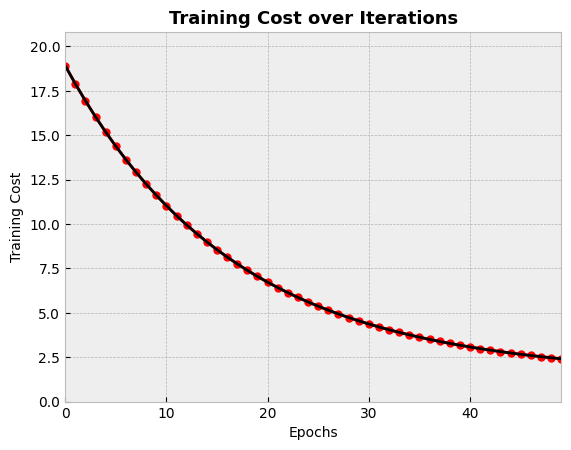

In [14]:
import sys
import os

from mlektic.linear_reg import LinearRegressionArcht
from mlektic.preprocessing import pd_dataset
from mlektic.plot_utils import plot_dynamic_cost
from mlektic.methods import regularizer_archt, optimizer_archt
import pandas as pd
import numpy as np

# Generar datos de ejemplo
np.random.seed(42)
n_samples = 100
feature1 = np.random.rand(n_samples)
feature2 = np.random.rand(n_samples)
target = 3 * feature1 + 5 * feature2 + np.random.randn(n_samples) * 0.5

# Crear el DataFrame
df = pd.DataFrame({
    'feature1': feature1,
    'feature2': feature2,
    'target': target
})

# Dividir en conjuntos de entrenamiento y prueba
train_set, test_set = pd_dataset(df, ['feature1', 'feature2'], 'target', 0.8)

# Entrenar el modelo
lin_reg = LinearRegressionArcht(iterations=50, optimizer=optimizer_archt('sgd-standard', learning_rate=0.01))
lin_reg.train(train_set)

# Mostrar el gráfico dinámico del costo
cost_history = lin_reg.get_cost_history()
plot_dynamic_cost(cost_history, title="Training Cost over Iterations", xlabel="Epochs", ylabel="Training Cost",
                  title_size=13, label_size=10, style='bmh', point_color='red', line_color='black')

In [17]:
import tensorflow as tf
import numpy as np

def calculate_r2(y_true: tf.Tensor, y_pred: tf.Tensor) -> tf.Tensor:
    """
    Calculates the R-squared (R2) score, which indicates the proportion of the variance in the dependent variable
    that is predictable from the independent variable(s).

    Args:
        y_true (tf.Tensor): True values. Shape should be (n_samples, 1).
        y_pred (tf.Tensor): Predicted values. Shape should be (n_samples, 1).

    Returns:
        tf.Tensor: R-squared score.
    """
    total_sum_of_squares = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true, axis=0)), axis=0)
    residual_sum_of_squares = tf.reduce_sum(tf.square(y_true - y_pred), axis=0)
    r2 = 1 - (residual_sum_of_squares / total_sum_of_squares)
    
    tf.print("Total sum of squares:", total_sum_of_squares)
    tf.print("Residual sum of squares:", residual_sum_of_squares)
    tf.print("R-squared:", r2)
    
    return r2

# Example data
y_true_np = np.array([3.0, -0.5, 2.0, 7.0])
y_pred_np = np.array([2.5, 0.0, 2.0, 8.0])

# Convert to tensors
y_true_tf = tf.convert_to_tensor(y_true_np, dtype=tf.float32)
y_pred_tf = tf.convert_to_tensor(y_pred_np, dtype=tf.float32)

# Calculate R^2 using TensorFlow
r2_tf = calculate_r2(y_true_tf, y_pred_tf)

# Calculate R^2 using NumPy for verification
total_sum_of_squares_np = np.sum(np.square(y_true_np - np.mean(y_true_np)))
residual_sum_of_squares_np = np.sum(np.square(y_true_np - y_pred_np))
r2_np = 1 - (residual_sum_of_squares_np / total_sum_of_squares_np)

print("R-squared (TensorFlow):", r2_tf.numpy())
print("R-squared (NumPy):", r2_np)


Total sum of squares: 29.1875
Residual sum of squares: 1.5
R-squared: 0.94860816
R-squared (TensorFlow): 0.94860816
R-squared (NumPy): 0.9486081370449679
